# Tugas Supervised Learning 
# Kecerdasan Buatan 2023/2024

Berikut adalah contoh aplikasi supervised learning untuk melakukan klasifikasi pada sebuah Dataset

Beberapa library yang harus diinstal dan disiapkan
1. Sklearn (pip install scikit-learn)
2. Pandas
3. Numpy
4. Matplotlib

====================================================================================================

### Import beberapa library yang akan kita gunakan

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Download dataset dan import kedalam code 

Dataset yang kita gunakan adalah dataset hepatitis dari https://archive.ics.uci.edu/dataset/46/hepatitis

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
hepatitis = fetch_ucirepo(id=46) 
  
# data (as pandas dataframes) 
X = hepatitis.data.features 
y = hepatitis.data.targets 
  
# metadata 
print(hepatitis.metadata) 
  
# variable information 
print(hepatitis.variables) 


{'uci_id': 46, 'name': 'Hepatitis', 'repository_url': 'https://archive.ics.uci.edu/dataset/46/hepatitis', 'data_url': 'https://archive.ics.uci.edu/static/public/46/data.csv', 'abstract': 'From G.Gong: CMU; Mostly Boolean or numeric-valued attribute types; Includes cost data (donated by Peter Turney)', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 155, 'num_features': 19, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1983, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5Q59J', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Please ask Gail Gong for further information on this database.', 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': None, 'preprocessing_descri

### Preview dataset yang sudah kalian download 

In [4]:
#code untuk preview fitur fitur yang digunakan (clue:.head())
print("Preview Fitur-fitur yang akan digunakan(X):")
print(X.head(10))

#code untuk preview target yang mau diklasifikasikan berdasarkan apa saja
print("Preview Target(y):")
print(y.head(10))

Preview Fitur-fitur yang akan digunakan(X):
   Age  Sex  Steroid  Antivirals  Fatigue  Malaise  Anorexia  Liver Big  \
0   30    2      1.0           2      2.0      2.0       2.0        1.0   
1   50    1      1.0           2      1.0      2.0       2.0        1.0   
2   78    1      2.0           2      1.0      2.0       2.0        2.0   
3   31    1      NaN           1      2.0      2.0       2.0        2.0   
4   34    1      2.0           2      2.0      2.0       2.0        2.0   
5   34    1      2.0           2      2.0      2.0       2.0        2.0   
6   51    1      1.0           2      1.0      2.0       1.0        2.0   
7   23    1      2.0           2      2.0      2.0       2.0        2.0   
8   39    1      2.0           2      1.0      2.0       2.0        2.0   
9   30    1      2.0           2      2.0      2.0       2.0        2.0   

   Liver Firm  Spleen Palpable  Spiders  Ascites  Varices  Bilirubin  \
0         2.0              2.0      2.0      2.0      2.0 

### Data Preprocessing

Data processing sangat penting sekali dilakukan karena untuk mencari dan menganalisa data apakah ada terdapat data yang belum bersih. Maksud dari belum bersih adalah terdapat data yang hilang, NaN, Null, dll. Sebelum di proses lebih lanjut data harus sudah bersih

In [5]:
#code untuk preprocessing (clue: (Data Cleaning) cek apakah terdapat data yang hilang, Nan, atau Null. 
X = hepatitis.data.features 
y = hepatitis.data.targets 

# Cek apakah terdapat data yang hilang (NaN atau Null)
print("Cek data yang hilang pada fitur-fitur:")
print(X.isnull().sum())

print("\nCek data yang hilang pada target:")
print(y.isnull().sum())


#Jika ada drop data tersebut by row atau by kolom. Silahkan dianalisa jika by row seperti apa dan by kolom seperti apa)

#by row
print(f"No. of drop Row X: {X.shape[0]}")
print(f"No. of drop Row Y: {y.shape[0]}")

x_drop = X.dropna(axis=0)
y_drop = y.loc[X.dropna(axis=0).index]

print("\nSetelah penghapusan data yang hilang by row:")
print(x_drop.isnull().sum())

print("\nPreview Fitur-fitur:")
print(x_drop.head(5))
print(y_drop.head(5))

print(f"No. of drop Row X: {x_drop.shape[0]}")
print(f"No. of drop Row Y: {y_drop.shape[0]}")



#by col
x_drop_col = X.dropna(axis=1)
print("\n")
print(x_drop_col.isnull().sum())
print("\nPreview Fitur-fitur:")
print(x_drop_col.head(10))





Cek data yang hilang pada fitur-fitur:
Age                 0
Sex                 0
Steroid             1
Antivirals          0
Fatigue             1
Malaise             1
Anorexia            1
Liver Big          10
Liver Firm         11
Spleen Palpable     5
Spiders             5
Ascites             5
Varices             5
Bilirubin           6
Alk Phosphate      29
Sgot                4
Albumin            16
Protime            67
Histology           0
dtype: int64

Cek data yang hilang pada target:
Class    0
dtype: int64
No. of drop Row X: 155
No. of drop Row Y: 155

Setelah penghapusan data yang hilang by row:
Age                0
Sex                0
Steroid            0
Antivirals         0
Fatigue            0
Malaise            0
Anorexia           0
Liver Big          0
Liver Firm         0
Spleen Palpable    0
Spiders            0
Ascites            0
Varices            0
Bilirubin          0
Alk Phosphate      0
Sgot               0
Albumin            0
Protime            0
H

### Lakukan Split data menjadi train dan test

Split data merupakan tahap penting dalam supervised learning. Karena algoritma nanti akan mempelajari data pada data train dan menguji hasil belajarnya pada data test

In [6]:
print(f"No. of X: {x_drop.shape[0]}")
print(f"No. of Y: {y_drop.shape[0]}")

#Code untuk splitting dataset
X_train, X_test, y_train, y_test = train_test_split(x_drop,y_drop, test_size=0.2, random_state=25,shuffle=False)


# print(training_data.head(10))

print(f"No. of training X: {X_train.shape[0]}")
print(f"No. of testing X: {X_test.shape[0]}")

print(f"No. of training Y: {y_train.shape[0]}")
print(f"No. of testing Y: {y_test.shape[0]}")


No. of X: 80
No. of Y: 80
No. of training X: 64
No. of testing X: 16
No. of training Y: 64
No. of testing Y: 16


====================================================================================================

### Proses Learning dengan Algoritma Supervised Learning

Pada tugas ini kita akan menggunakan 2 algoritma
1. KNN
2. Naive Bayes

### Algoritma KNN

In [7]:
# code panggil fungsi KNN pada library sklearn
neigh = KNeighborsClassifier(n_neighbors=4)

# code masukkan datatrain pada KNN dan jalankan proses learningnya
neigh.fit(X_train, y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

### Uji hasil Learning KNN

Nilai Data Aktual
     Class
124      2
125      2
127      1
128      2
129      1
130      2
133      2
134      1
135      2
137      2
138      1
139      2
143      1
145      2
153      2
154      1
Nilai Data Hasil Klasifikasi
[2 2 2 2 2 1 2 2 2 1 2 2 2 2 1 1]


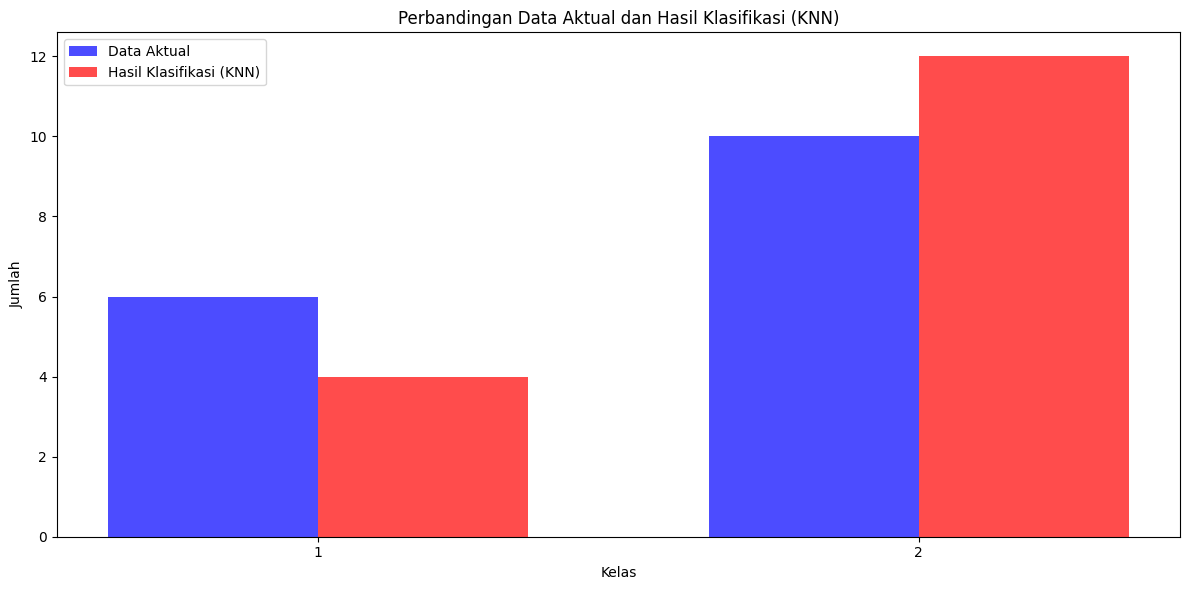

In [8]:
# code untuk pengujian hasil learning menggunakan KNN pada Datatest
predicted = neigh.predict(X_test)

# code hasil output
print("Nilai Data Aktual")
print(y_test)

print("Nilai Data Hasil Klasifikasi")
print(predicted)

# code visualisasi hasil output dengan membandingkan data aktual dengan data hasil klasifikasi
comparison_df = pd.DataFrame({
    'Aktual': y_test['Class'].values.flatten(),
    'Prediksi': predicted.flatten()
})


# Menghitung jumlah aktual dan prediksi
aktual_counts = comparison_df['Aktual'].value_counts().sort_index()
prediksi_counts = comparison_df['Prediksi'].value_counts().sort_index()

# Menyusun data untuk plotting
labels = sorted(set(comparison_df['Aktual']))
bar_width = 0.35
index = np.arange(len(labels))

# Membuat bar untuk data aktual
plt.figure(figsize=(12, 6))
plt.bar(index, [aktual_counts.get(label, 0) for label in labels], bar_width, label='Data Aktual', color='b', alpha=0.7)

# Membuat bar untuk prediksi
plt.bar(index + bar_width, [prediksi_counts.get(label, 0) for label in labels], bar_width, label='Hasil Klasifikasi (KNN)', color='r', alpha=0.7)

# Menambahkan label, judul, dan legenda
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.title('Perbandingan Data Aktual dan Hasil Klasifikasi (KNN)')
plt.xticks(index + bar_width / 2, labels)
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()




### Algoritma Naive Bayes

In [9]:
# code panggil fungsi Naive Bayes pada library sklearn
nb = GaussianNB()

# code masukkan datatrain pada KNN dan jalankan proses learningnya
nb.fit(X_train, y_train)


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

### Uji hasil Learning Naive Bayes

Nilai Data Aktual
     Class
124      2
125      2
127      1
128      2
129      1
130      2
133      2
134      1
135      2
137      2
138      1
139      2
143      1
145      2
153      2
154      1
Nilai Data Hasil Klasifikasi
[1 2 1 1 1 1 1 1 2 1 1 2 1 1 2 1]


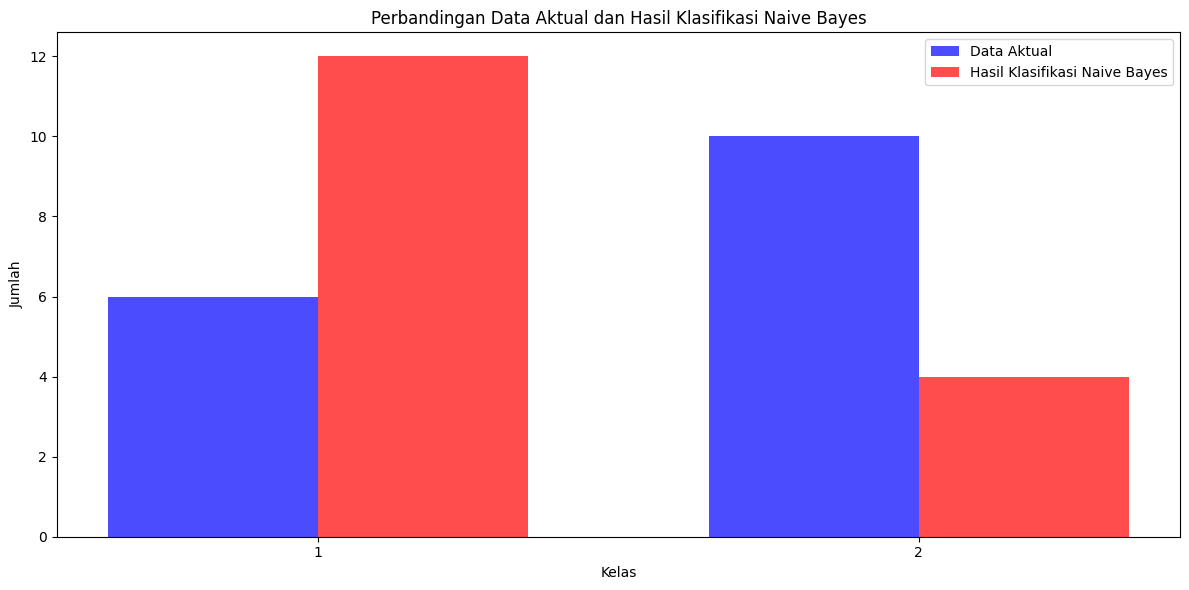

In [13]:
# code untuk pengujian hasil learning menggunakan Naive Bayes pada Datatest
y_pred = nb.predict(X_test)


# code hasil output
print("Nilai Data Aktual")
print(y_test)

print("Nilai Data Hasil Klasifikasi")
print(y_pred)


# code visualisasi hasil output dengan membandingkan data aktual dengan data hasil klasifikasi
comparison_df = pd.DataFrame({
    'Aktual': y_test['Class'].values.flatten(),
    'Prediksi': y_pred.flatten()
})


# Menghitung jumlah aktual dan prediksi
aktual_counts = comparison_df['Aktual'].value_counts().sort_index()
prediksi_counts = comparison_df['Prediksi'].value_counts().sort_index()

# Menyusun data untuk plotting
labels = sorted(set(comparison_df['Aktual']))
bar_width = 0.35
index = np.arange(len(labels))

# Membuat bar untuk data aktual
plt.figure(figsize=(12, 6))
plt.bar(index, [aktual_counts.get(label, 0) for label in labels], bar_width, label='Data Aktual', color='b', alpha=0.7)

# Membuat bar untuk prediksi
plt.bar(index + bar_width, [prediksi_counts.get(label, 0) for label in labels], bar_width, label='Hasil Klasifikasi Naive Bayes', color='r', alpha=0.7)

# Menambahkan label, judul, dan legenda
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.title('Perbandingan Data Aktual dan Hasil Klasifikasi Naive Bayes')
plt.xticks(index + bar_width / 2, labels)
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

====================================================================================================

## Pengujian

Setelah kita membuat model klasifikasi dengan menggunakan algoritma KNN dan Naive Bayes, hal selanjutnya yaitu kita perlu menguji algoritma mana yang paling baik di antara 2 algoritma tersebut. Metrics atau satuan pengukuran yang akan kita gunakan adalah Accuracy dan Precision

### Hitung nilai akurasi dan presisi dari model KNN

In [11]:
# code untuk menghitung akurasi 
print("Nilai akurasi KNN sebesar ",accuracy_score(y_test, predicted))

# code untuk menghitung presisi
print("Nilai Presisi KNN sebesar ",precision_score(y_test, predicted))

print("\nHasil Classification")
print(classification_report(y_test, predicted))


Nilai akurasi KNN sebesar  0.5
Nilai Presisi KNN sebesar  0.25

Hasil Classification
              precision    recall  f1-score   support

           1       0.25      0.17      0.20         6
           2       0.58      0.70      0.64        10

    accuracy                           0.50        16
   macro avg       0.42      0.43      0.42        16
weighted avg       0.46      0.50      0.47        16



### Hitung nilai akurasi dan presisi dari model Naive Bayes

In [12]:
# code untuk menghitung akurasi 
print("Nilai akurasi Naive Bayes sebesar ",accuracy_score(y_test, y_pred))

# code untuk menghitung presisi
print("Nilai Presisi Naive Bayes sebesar ",precision_score(y_test, y_pred))


print("\nHasil Classification")
print(classification_report(y_test, y_pred))

Nilai akurasi Naive Bayes sebesar  0.625
Nilai Presisi Naive Bayes sebesar  0.5

Hasil Classification
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         6
           2       1.00      0.40      0.57        10

    accuracy                           0.62        16
   macro avg       0.75      0.70      0.62        16
weighted avg       0.81      0.62      0.61        16



====================================================================================================

## Kesimpulan

Dari apa yang telah kalian lakukan dapat disimpulkan dengan menjawab beberapa pertanyaan berikut:
1. Mengapa dataset perlu dilakukan tahap preprocessing?
2. Mengapa dataset perlu dilakukan splitting?
3. Bagaimana konsep dan cara kerja dari KNN dan Naive Bayes?
4. Pada hasil pengujian manakan yang paling baik antara KNN dengan Naive Bayes pada dataset ini?
5. Apa perbedaan dari akurasi dan presisi?

Silahkan dilengkapi kode di atas. Pastikan tidak ada code error. Kemudian buat sebuah laporan yang menjelaskan
step by step dari notebook ini. Jangan lupa cantumkan Nama, NIM, dan Kelas. Deadline pengerjaan 1 minggu

Link pengumpulan : https://forms.gle/M7P91LwiZU6bqAEn6